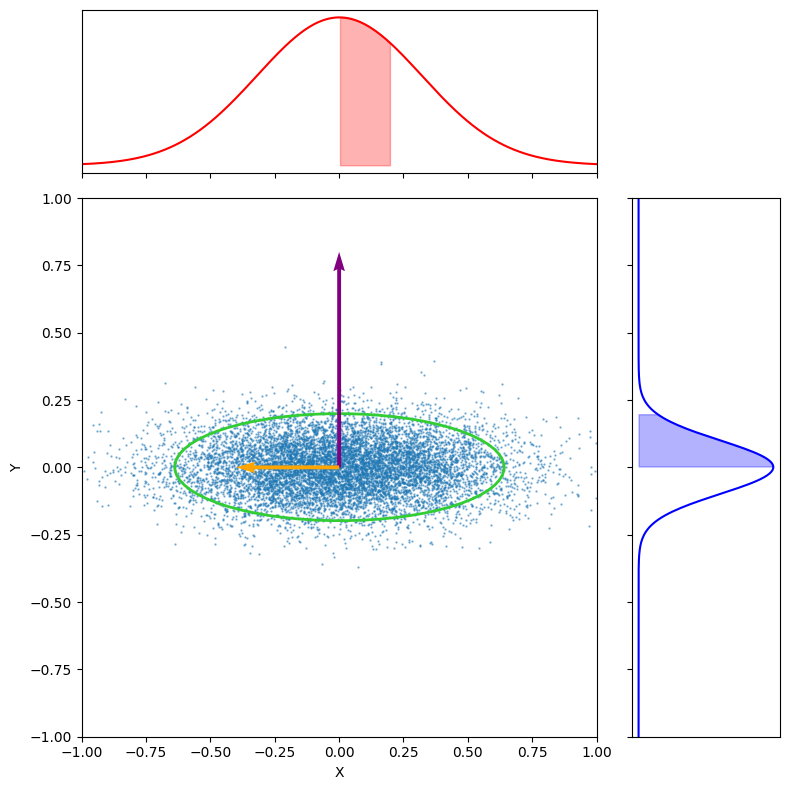

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.gridspec as gridspec
from scipy.stats import norm

# Generate synthetic bivariate data
np.random.seed(42)
mean = [0, 0]
cov = [[0.1,0], [0, 0.01]]  # Covariance matrix
x, y = np.random.multivariate_normal(mean, cov, 10000).T

# Create figure and grid layout
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 4)

# Scatter plot
ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_scatter.scatter(x, y, s=0.5, alpha=0.5)
ax_scatter.set_xlim(-1, 1)
ax_scatter.set_ylim(-1, 1)

# Draw confidence ellipse
def plot_confidence_ellipse(x, y, ax, n_std=2.0, **kwargs):
    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
                      width=ell_radius_x * 2,
                      height=ell_radius_y * 2,
                      facecolor='none',
                      edgecolor='limegreen',
                      lw=2,
                      **kwargs)
    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    transf = (plt.matplotlib.transforms.Affine2D()
              .rotate_deg(45)
              .scale(scale_x, scale_y)
              .translate(mean_x, mean_y))

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

plot_confidence_ellipse(x, y, ax_scatter)

# Add vectors and perpendiculars
origin = np.array([[0, 0]])
ax_scatter.quiver(*origin.T, 0, 0.8, angles='xy', scale_units='xy', scale=1, color='purple')
ax_scatter.quiver(*origin.T, -0.4, 0, angles='xy', scale_units='xy', scale=1, color='orange')

ax_scatter.set_xlabel('X')
ax_scatter.set_ylabel('Y')

# PDF plots
ax_pdfx = fig.add_subplot(gs[0, 0:3], sharex=ax_scatter)
ax_pdfy = fig.add_subplot(gs[1:4, 3], sharey=ax_scatter)

x_vals = np.linspace(-1, 1, 300)
y_vals = np.linspace(-1, 1, 300)

x_mean, x_std = np.mean(x), np.std(x)
y_mean, y_std = np.mean(y), np.std(y)

x_pdf = norm.pdf(x_vals, x_mean, x_std)
y_pdf = norm.pdf(y_vals, y_mean, y_std)

ax_pdfx.plot(x_vals, x_pdf, color='red')
ax_pdfy.plot(y_pdf, y_vals, color='blue')

# Highlight region between 0 and c under the PDF
c = 0.2

# For X-PDF (top)
mask_x = (x_vals >= 0) & (x_vals <= c)
ax_pdfx.fill_between(x_vals[mask_x], 0, x_pdf[mask_x], color='red', alpha=0.3)

# For Y-PDF (right)
mask_y = (y_vals >= 0) & (y_vals <= c)
ax_pdfy.fill_betweenx(y_vals[mask_y], 0, y_pdf[mask_y], color='blue', alpha=0.3)

# Set limits for PDF axes
ax_pdfx.set_xlim(-1, 1)
ax_pdfy.set_ylim(-1, 1)

# Clean up axes
plt.setp(ax_pdfx.get_xticklabels(), visible=False)
plt.setp(ax_pdfy.get_yticklabels(), visible=False)
ax_pdfx.set_yticks([])
ax_pdfy.set_xticks([])

# Adjust layout
plt.tight_layout()

# Save as SVG
plt.savefig("scatter_with_shaded_pdfs.svg", format="svg")
plt.show()
